# Time Series Analysis:

## Learning Objectives (Competencies)
By the end of this lesson, students will be able to:
1. Describe what is time series
2. Describe how can decompose the time series into trend and seasonality
3. Learn how we can compute the monthly rate of return for a stock data set

# Review: Sort the following data frame based on date

In [1]:
import pandas as pd

df = pd.DataFrame({'Value':['100','78','129'] , 'Date':['02/20/2015','01/15/2016','08/21/2015']})

print(df)

  Value        Date
0   100  02/20/2015
1    78  01/15/2016
2   129  08/21/2015


In [3]:
# Correclty adjust how the date should look in pandas: year/month/day

df['Date'] = pd.to_datetime(df['Date'])

df.sort_values(by='Date') # sorted by most recent date

,Value,Date
0,100,2015-02-20
2,129,2015-08-21
1,78,2016-01-15


# Activity: Obtain the trend and seasonality for air passenger dataset

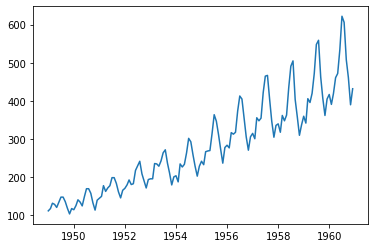

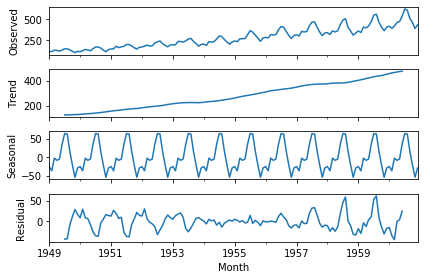

In [20]:
import matplotlib.pyplot as plt

# this graph shows the trend of air passengers over the years: it increases
df = pd.read_csv('AirPassengers.csv')

df['Month'] = pd.to_datetime(df['Month']) # Must always sort the date like this!
plt.plot(df['Month'], df['#Passengers'])
plt.show()


# Apply decomposition analysis to teh time series
import statsmodels.api as sm
df = df.set_index(['Month'])
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
decomposition.plot()
plt.show()

## Sampling and Smoothing
Most of the time, for time series analysis, the data has many jumps and downs.
It is desired to have smoother version of time series.
We have two options:
1- Sampling the time series
2- Smoothing the time series

## Activity: Time Series Sampling and Smoothing on Apple dataset
Task: Plot the "Close", which is stock market price at closing time (5:30 p.m. NY time), its sampled version and its smoothed version.
Steps:
1- Load and plot Apple Stock Market dataset:
Hint:

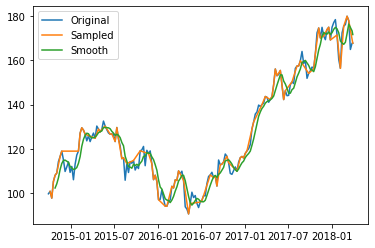

In [28]:
data = pd.read_csv('AAPL.csv')

data['Date'] = pd.to_datetime(data['Date'])
data['Tick'] = range(0, len(data))
plt.plot(data['Date'], data['Close'], label = 'Original') # blue line

#Sample Time Series
data_one_tenth = data.sample(frac=0.5) # 0.5 means use 50% of the data
data_one_tenth = data_one_tenth.sort_values(by=['Tick'])
plt.plot(data_one_tenth['Date'], data_one_tenth['Close'], label='Sampled') # orange line

#Smooth the dataset
data['Rolling_Mean'] = data['Close'].rolling(window=5).mean() # 
plt.plot(data['Date'], data['Rolling_Mean'], label='Smooth') # green line

#plot them all
plt.legend() # designated by label=''
plt.show()

## Using Quandl for Time Series analysis
The library that we will use for retrieving financial, economic and sociology data is the python api for Quandl.
Head over to https://www.quandl.com/ to sign up for an account to get an API key first!

## Activity: Compute the monthly return for Apple stock data for March 2017
In order to compute the monthly return for specific month, we should slice the dataset
We again only look at "Close" market price for apple from quandl
Task: compute monthly return
1- First read this article: https://www.quantconnect.com/tutorials/introduction-to-financial-python/rate-of-return,-mean-and-variance
2- Translate the formula to Python code

In [66]:
import numpy as np
# import quandl
import pandas as pd

aapl_table = pd.read_pickle('apple_quandl.pkl')

aapl_table.head()
aapl = aapl_table.loc['2017-3',['Open','Close']]

#take log return
aapl['log_price'] = np.log(aapl.Close)
aapl['log_return'] = aapl['log_price'].diff()
print(aapl)

               Open   Close  log_price  log_return
Date                                              
2017-03-01  137.890  139.79   4.940141         NaN
2017-03-02  140.000  138.96   4.934186   -0.005955
2017-03-03  138.780  139.78   4.940070    0.005884
2017-03-06  139.365  139.34   4.936917   -0.003153
2017-03-07  139.060  139.52   4.938208    0.001291
2017-03-08  138.950  139.00   4.934474   -0.003734
2017-03-09  138.740  138.68   4.932169   -0.002305
2017-03-10  139.250  139.14   4.935481    0.003311
2017-03-13  138.850  139.20   4.935912    0.000431
2017-03-14  139.300  138.99   4.934402   -0.001510
2017-03-15  139.410  140.46   4.944923    0.010521
2017-03-16  140.720  140.69   4.946559    0.001636
2017-03-17  141.000  139.99   4.941571   -0.004988
2017-03-20  140.400  141.46   4.952017    0.010446
2017-03-21  142.110  139.84   4.940499   -0.011518
2017-03-22  139.845  141.42   4.951734    0.011235
2017-03-23  141.260  140.92   4.948192   -0.003542
2017-03-24  141.500  140.64   4

# 3 Ways in Pandas to compute return for March 2017:

In [67]:
# 1: take the log of close column, 
# then obtain the difference between consecutive days, 
# then add them all

# From compund rate of return formula
aapl['log_price'] = np.log(aapl['Close'])
x = np.diff(aapl['log_price'])
print(aapl)
print(x.sum()*100)

               Open   Close  log_price  log_return
Date                                              
2017-03-01  137.890  139.79   4.940141         NaN
2017-03-02  140.000  138.96   4.934186   -0.005955
2017-03-03  138.780  139.78   4.940070    0.005884
2017-03-06  139.365  139.34   4.936917   -0.003153
2017-03-07  139.060  139.52   4.938208    0.001291
2017-03-08  138.950  139.00   4.934474   -0.003734
2017-03-09  138.740  138.68   4.932169   -0.002305
2017-03-10  139.250  139.14   4.935481    0.003311
2017-03-13  138.850  139.20   4.935912    0.000431
2017-03-14  139.300  138.99   4.934402   -0.001510
2017-03-15  139.410  140.46   4.944923    0.010521
2017-03-16  140.720  140.69   4.946559    0.001636
2017-03-17  141.000  139.99   4.941571   -0.004988
2017-03-20  140.400  141.46   4.952017    0.010446
2017-03-21  142.110  139.84   4.940499   -0.011518
2017-03-22  139.845  141.42   4.951734    0.011235
2017-03-23  141.260  140.92   4.948192   -0.003542
2017-03-24  141.500  140.64   4

In [69]:
# 2. Instead of having two steps, use: pct_change
# Another way to compute the montly return
returns = aapl['Close'].pct_change()
print(returns.sum()*100)
print(np.log(143.66/139.79)*100)

2.784543213973867
2.7308100163618443


In [59]:
monthly_return = aapl.log_return.sum()
print(monthly_return)

0.0273081001636184


In [60]:
print(np.mean(aapl.log_price))

4.94597446550658


In [62]:
# Variance is a measure of dispersion. In finance, most of the time variance is a synonym for risk. 
# The higher the variance of an asset price is, the higher risk the asset bears.

print(np.var(aapl.log_price))

0.00014203280448152512


In [64]:
# The most commonly used measure of dispersion in finance is standard deviation. 
# It's usually represented by σ. It's obvious to see the relation between standard deviation and variance:
print(np.std(aapl.log_price))

0.011917751653794651


# Pandas methods useful for time series:
> - pd.to_datetime()
> - df.sample()
> - df[''].rolling(window = )
> - df[''].pct_change()